In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

1. TEMPLATE MATCHING

1. Nghiên cứu và trình bày những hiểu biết về phương pháp Template Matching cho việc phát hiện đối tượng trong ảnh.
    Template Matching là phương pháp tìm kiếm và tìm vị trí của hình ảnh mẫu trong hình ảnh lớn hơn. OpenCV có hỗ trợ hàm cv.matchTemplate() để thực thi phương pháp này. Phương pháp hoạt động bằng cách trượt hình ảnh mẫu lên hình ảnh đầu vào (như trong tích chập 2D) và so sánh mẫu và bản vá của hình ảnh đầu vào dưới hình ảnh mẫu. Đầu ra là một hình ảnh thang độ xám, trong đó mỗi pixel biểu thị mức độ lân cận của pixel đó khớp với mẫu. 

    Ảnh đầu vào có kích thước (WxH) và ảnh mẫu có kích thước (wxh), ảnh đầu ra sẽ có kích thước (W-w+1, H-h+1).Sử dụng hàm cv.minMaxLoc() để tìm giá trị tối đa/tối thiểu, dùng nó như điểm góc để vẽ hình chữ nhật, lấy chiều cao chiều rộng theo ảnh mẫu và ta có được hình chữ nhật bao quanh vùng trùng khớp với ảnh mẫu của ảnh

2. Trình bày các bước và code minh họa bằng Python cho phát hiện đối tượng với 
Template Maching; Trình bày cú pháp các hàm và ý nghĩa các lệnh được sử dụng.
    Các dạng so khớp:
        cv.TM_CCOEFF
        cv.TM_CCOEFF_NORMED
        cv.TM_CCORR
        cv.TM_CCORR_NORMED
        cv.TM_SQDIFF
        cv.TM_SQDIFF_NORMED

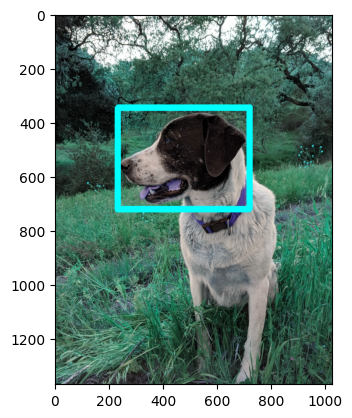

In [3]:
# Đọc ảnh dùng để tìm kiếm 
img_rgb = cv2.imread('sammy.jpg') 

# Chuyển nó thành ảnh xám 
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) 

# Đọc ảnh mẫu
template = cv2.imread('sammy_face.jpg', 0) 

# Lưu lại chiều dài rộng của ảnh mẫu
w, h = template.shape[::-1] 

# Thực hiện việc so khớp. 
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED) 

# Đặt ngưỡng  
threshold = 0.8

# Lưu vị trí trùng khớp với dạng mảng numpy 
loc = np.where(res >= threshold) 

#Vẽ hình chữ nhật quanh vùng trùng khớp. 
for pt in zip(*loc[::-1]): 
	cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2) 

#Hiển thị kết quả
plt.imshow(img_rgb, cmap='gray') 


2. PHÁT HIỆN ĐỐI TƯỢNG VỚI HAAR CASCADES
    1. Tìm hiểu và trình bày những hiểu biết về thuật toán Haar Cascades thông qua bài báo: 
Viola, Paul & Jones, Michael. (2001). Rapid Object Detection using a Boosted Cascade 
of Simple Features. IEEE Conf Comput Vis Pattern Recognit. 1. I-511. 
10.1109/CVPR.2001.990517

Phân loại Haar Cascades là cách hiệu quả để phát hiện đối tượng, phương pháp được đề xuất bởi  Paul Viola và Michael Jones trong một bài báo. LÀ phương pháp học máy dựa trên huấn luyện với tập dữ liệu có và không có đối tượng phân loại 

True

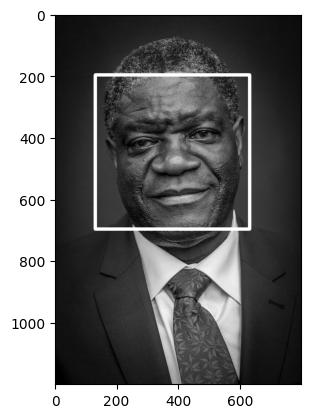

In [4]:



# Read in the cascade classifiers for face and eyes
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')



# create a function to detect face
def adjusted_detect_face(img):
	
	face_img = img.copy()
	
	face_rect = face_cascade.detectMultiScale(face_img, 
											scaleFactor = 1.2, 
											minNeighbors = 5)
	
	for (x, y, w, h) in face_rect:
		cv2.rectangle(face_img, (x, y), 
					(x + w, y + h), (255, 255, 255), 10)\
		
	return face_img


# create a function to detect eyes
def detect_eyes(img):
	
	eye_img = img.copy() 
	eye_rect = eye_cascade.detectMultiScale(eye_img, 
											scaleFactor = 1.2, 
											minNeighbors = 5) 
	for (x, y, w, h) in eye_rect:
		cv2.rectangle(eye_img, (x, y), 
					(x + w, y + h), (255, 255, 255), 10)	 
	return eye_img

# Reading in the image and creating copies
img = cv2.imread('Denis_Mukwege.jpg')
img_copy1 = img.copy()
img_copy2 = img.copy()
img_copy3 = img.copy()

# Detecting the face 
face = adjusted_detect_face(img_copy1)
plt.imshow(face)
# Saving the image
cv2.imwrite('face1.jpg', face)


True

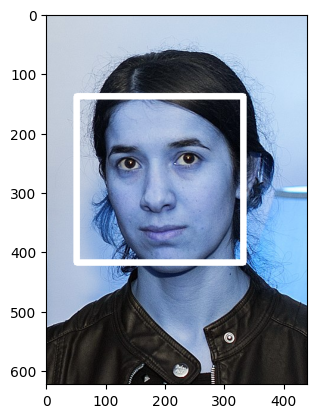

In [5]:



# Read in the cascade classifiers for face and eyes
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')



# create a function to detect face
def adjusted_detect_face(img):
	
	face_img = img.copy()
	
	face_rect = face_cascade.detectMultiScale(face_img, 
											scaleFactor = 1.2, 
											minNeighbors = 5)
	
	for (x, y, w, h) in face_rect:
		cv2.rectangle(face_img, (x, y), 
					(x + w, y + h), (255, 255, 255), 10)\
		
	return face_img


# create a function to detect eyes
def detect_eyes(img):
	
	eye_img = img.copy() 
	eye_rect = eye_cascade.detectMultiScale(eye_img, 
											scaleFactor = 1.2, 
											minNeighbors = 5) 
	for (x, y, w, h) in eye_rect:
		cv2.rectangle(eye_img, (x, y), 
					(x + w, y + h), (255, 255, 255), 10)	 
	return eye_img

# Reading in the image and creating copies
img = cv2.imread('Nadia_Murad.jpg')
img_copy1 = img.copy()
img_copy2 = img.copy()
img_copy3 = img.copy()

# Detecting the face 
face = adjusted_detect_face(img_copy1)
plt.imshow(face)
# Saving the image
cv2.imwrite('face1.jpg', face)


True

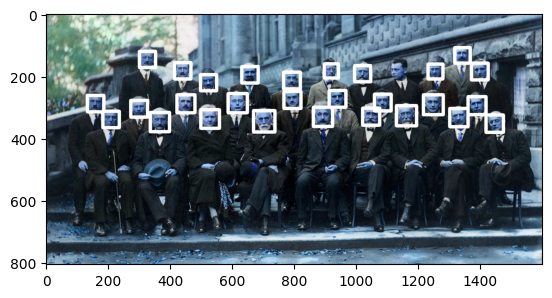

In [6]:



# Đọc các file hỗ trợ phát hiện
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')



# Tạo hàm để phát hiện khuôn mặt
def adjusted_detect_face(img):
	
	face_img = img.copy()
	
	face_rect = face_cascade.detectMultiScale(face_img, 
											scaleFactor = 1.2, 
											minNeighbors = 5)
	
	for (x, y, w, h) in face_rect:
		cv2.rectangle(face_img, (x, y), 
					(x + w, y + h), (255, 255, 255), 10)\
		
	return face_img


# tạo hàm phát hiện mắt
def detect_eyes(img):
	
	eye_img = img.copy() 
	eye_rect = eye_cascade.detectMultiScale(eye_img, 
											scaleFactor = 1.2, 
											minNeighbors = 5) 
	for (x, y, w, h) in eye_rect:
		cv2.rectangle(eye_img, (x, y), 
					(x + w, y + h), (255, 255, 255), 10)	 
	return eye_img

# Đọc ảnh và tạo các bản sao để thử nhiều hàm khác
img = cv2.imread('solvay_conference.jpg')
img_copy1 = img.copy()
img_copy2 = img.copy()
img_copy3 = img.copy()

# thực hiện phát hiện khuôn mặt  
face = adjusted_detect_face(img_copy1)
plt.imshow(face)
# lưu annhr phát hiện
cv2.imwrite('face2.jpg', face)